In [21]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics


# About the company

*Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan*

# Problem Statement:-

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are

**eligible for loan amount so that they can specifically target these customers**

# Features of our data

1.LoanID= Unique Loan ID          
2.Gender= Male/ Female           
3.Married= Applicant married (Y/N)                  
4.Dependents= Number of dependents          
5.Education= Applicant Education (Graduate/ Under Graduate)                   
6.SelfEmployed= Self-employed (Y/N)         
7.ApplicantIncome= Applicant income           
8.CoapplicantIncome= Coapplicant income              
9.LoanAmount= Loan amount in thousands           
10.LoanAmountTerm= Term of the loan in months          
11.CreditHistory= Credit history meets guidelines 12.PropertyArea= Urban/ Semi-Urban/ Rural              
13.LoanStatus= (Target) Loan approved (Y/N) ##Features of a Testing dataset:-

**Importing necessary modules**

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading our dataset**

In [23]:
#Loading the Dataset to pandas Dataframe
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

#Printing the first 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We can observe from the above top 5 entries that there are object and numeric data types in our dataset      
There are null values in our data which needs to be handled before we start building our model     
Loan Status is our target columns which needs to be predicted based on the remaining independent features of our data

**Checking test data**

In [24]:
test=pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Number of Rows and Columns**

In [25]:
df.shape

(614, 13)

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Above information reflects that our dataset has 5 numerical and 8 object columns       
There are null values in multiple columns which needs to be handled      
There are total 13 columns in our dataset with 614 entries      

**Checking the Statistical measures of our data to check for skewness and distribution**

In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Handling null values

In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Finding the mode for object datatype which can be used to replace the null value**

In [29]:
print('Gender Mode: ',df['Gender'].mode())
print('Married mode: ',df['Married'].mode())
print('Self_Employed',df['Self_Employed'].mode())
print('Credit_History',df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married mode:  0    Yes
Name: Married, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [30]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

3+ is an invalid value entered which is making this int column as object which needs to be corrected and converted into numeric data type

In [31]:
df['Dependents'].replace('3+',4,inplace=True)#Replacing 3+ to 4
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

**Replacing null values with mean for numeric and mode for object data type**

In [32]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)#replacing with mode
df['Married'].fillna(df['Married'].mode()[0],inplace=True)#replacing with mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)#replacing with mode
df['LoanAmount'].fillna((df['LoanAmount'].mean()),inplace=True)#replacing with mean
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)#replacing with suitable option after visual analysis
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)#replacing with mode
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)#replacing with mode

In [33]:
df['Dependents']=df['Dependents'].astype('int')
df['Dependents'].dtype

dtype('int64')

In [34]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Missing values has now been handled**

**Lets drop the loan_id column as its a noise for our model and doesnt make any impact on the target**

In [35]:
df.drop('Loan_ID',axis=1,inplace=True)

**Checking unique values in our dataset for better understanding**

In [36]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

**Duplicates in dataset**

In [37]:
df.duplicated().sum()

0

# Checking for outliers

<Figure size 1000x400 with 0 Axes>

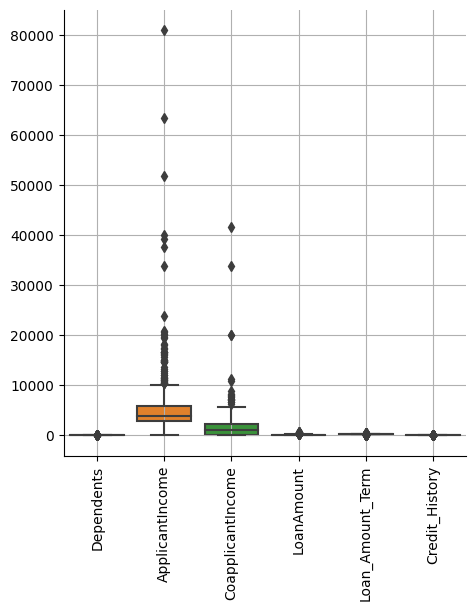

In [38]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

* There seems to be high positive skewness in Dependents, Applicant Income,Co applicant income, loan amount wherein there might be chances of outliers which needs to be checked      
* Loan amount term and credit history has negative skewness
* There seems to be outliers in applicant income and coapplicant income which needs to be taken into consideration

# Visually analysing object data type

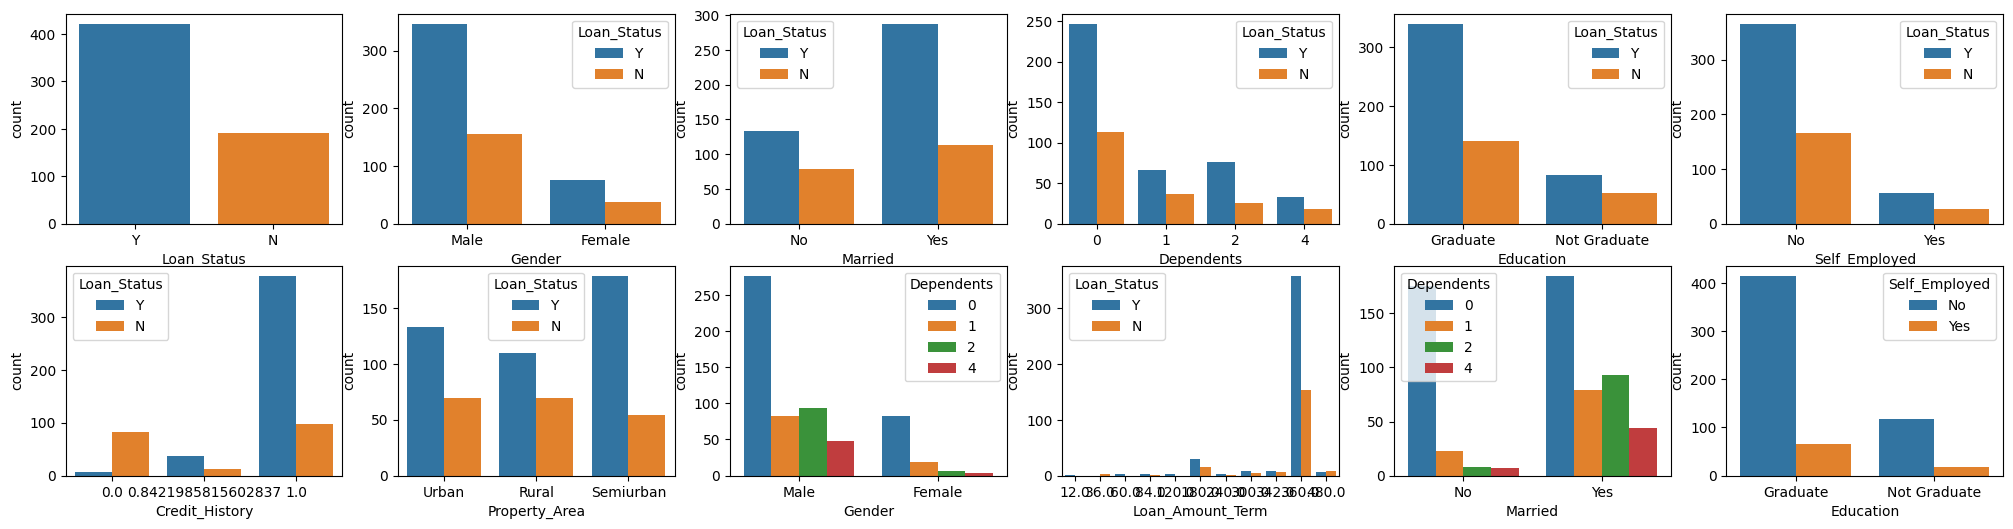

In [39]:
fig, axs = plt.subplots(figsize=(25,6),ncols=6,nrows=2)
sns.countplot(x=df['Loan_Status'],ax=axs[0,0])
sns.countplot(x=df['Gender'],hue=df['Loan_Status'],ax=axs[0,1])
sns.countplot(x=df['Married'],hue=df['Loan_Status'],ax=axs[0,2])
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'],ax=axs[0,3])
sns.countplot(x=df['Education'],hue=df['Loan_Status'],ax=axs[0,4])
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'],ax=axs[0,5])
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'],ax=axs[1,0])
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'],ax=axs[1,1])
sns.countplot(x=df['Gender'],hue=df['Dependents'],ax=axs[1,2])
sns.countplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'],ax=axs[1,3])
sns.countplot(x=df['Married'],hue=df['Dependents'],ax=axs[1,4])
sns.countplot(x=df['Education'],hue=df['Self_Employed'],ax=axs[1,5])
plt.show()

1.  Loan_Status is our target variable which seems to be imbalanced as its in 1:3 ratio which needs to be worked on for our model to make accurate predictions
2. Males are more likely to be eligible for loans compared to female
3. Married are more likely to be eligible for loans compared to non married
4. People with less dependents are eligible for loans
5. Graduates are eligible for loan compared to non graduate
6. Non Selfemployed are eligible for loan compared to selfemployed
7. Poeple with good credit score are more likely to be eligible for loan compared to low credit scored
8. Semiurban and Urban people have are eligible for loan compared to rural population
9. Male have more dependents compared to female
10. Mostly people opt for 360 months term loan
11. Married people have more dependents compared to female
12. Graduates are selfemployed compared to non graduates

# Visually analysing numeric data type

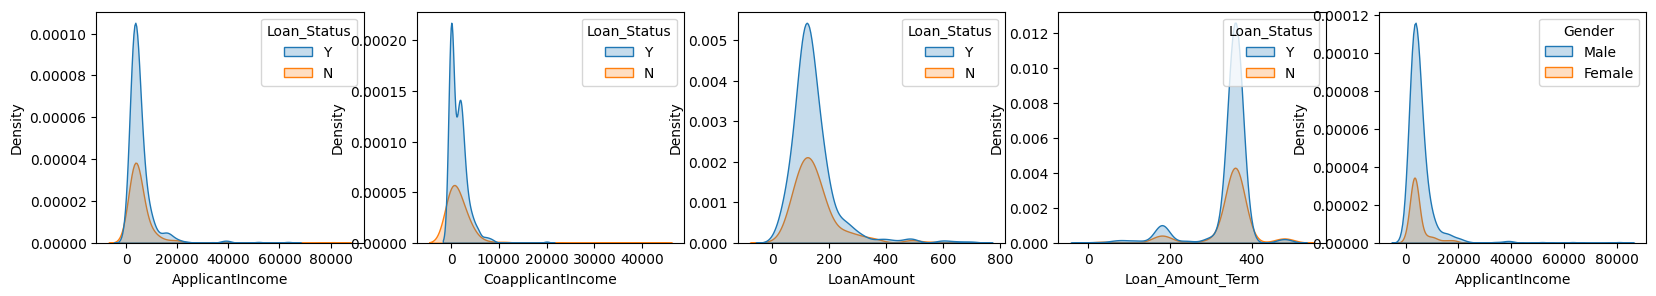

In [40]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.kdeplot(x=df['ApplicantIncome'],hue=df['Loan_Status'],fill=True,ax=axs[0])
sns.kdeplot(x=df['CoapplicantIncome'],hue=df['Loan_Status'],fill=True,ax=axs[1])
sns.kdeplot(x=df['LoanAmount'],hue=df['Loan_Status'],fill=True,ax=axs[2])
sns.kdeplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'],fill=True,ax=axs[3])
sns.kdeplot(x=df['ApplicantIncome'],hue=df['Gender'],fill=True,ax=axs[4])
plt.show()

1. There is high positive skewness in Applicant income and coapplicant income
2. There is negative skewness in loan_Amount_term
3. Income range between 0:20k are eligible for loan

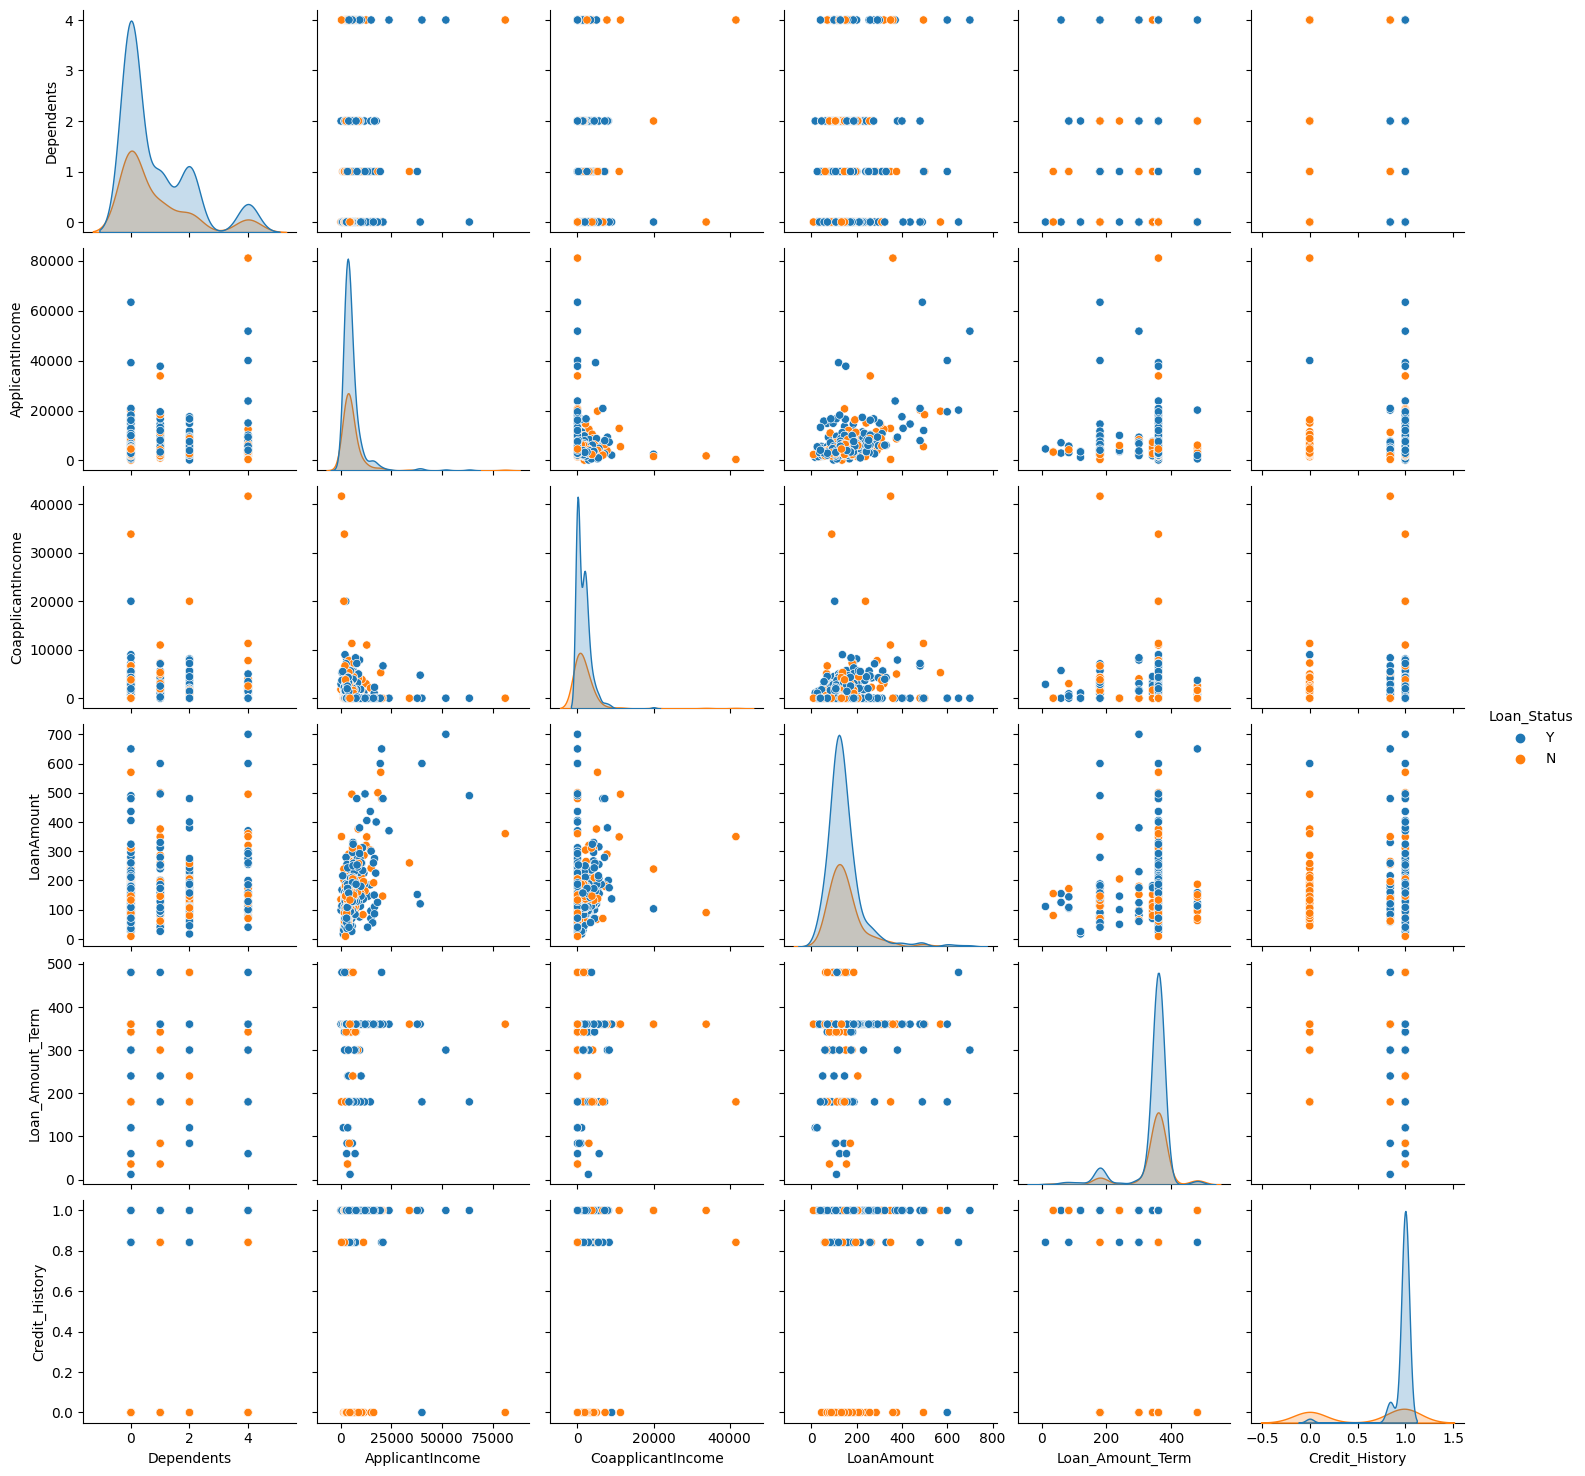

In [41]:
sns.pairplot(df,hue='Loan_Status')

**Fetching all object data typecolumns to covert**

In [42]:
obj_col=df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

# Converting object to numeric data type

In [43]:
df.replace({'Married':{'Yes':1,'No':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':\
            {'Rural':0,'Semiurban':0.5,'Urban':1},'Education':{'Graduate':1,"Not Graduate":0},\
            'Loan_Status': {'Y':1, 'N':0}},inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [45]:
df=pd.get_dummies(df)

In [46]:
df.sample(2)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
357,1,1,1,0,3875,0.0,67.0,360.0,1.0,1.0,0,0,1
580,1,2,1,0,6540,0.0,205.0,360.0,1.0,0.5,1,0,1


# Saving our cleaned , preprocessed df in data variable for future analysis if needed

In [47]:
data=df

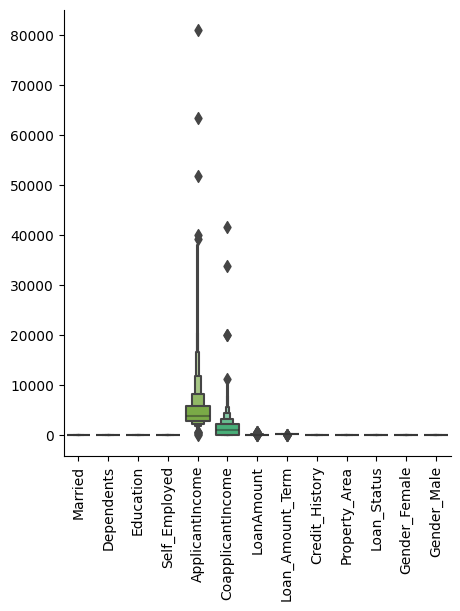

In [48]:
sns.catplot(data=df,kind='boxen')
plt.xticks(rotation=90)
plt.show()

**Dropping the anomalies from data**

In [49]:
df.drop(df['CoapplicantIncome'][df['CoapplicantIncome']>15000].index, inplace=True)
df.drop(df['ApplicantIncome'][df['ApplicantIncome']>40000].index, inplace=True)

In [50]:
df.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,0.654036,0.813839,0.779242,0.133443,5132.243822,1449.655552,144.258760,342.484349,0.842286,0.515651,0.690280,0.182867,0.817133
std,0.476074,1.196780,0.415100,0.340334,4366.069396,1773.588776,79.199307,64.029562,0.349733,0.393011,0.462759,0.386876,0.386876
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2891.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3813.000000,1167.000000,128.000000,360.000000,1.000000,0.500000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5763.000000,2264.500000,162.000000,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,4.000000,1.000000,1.000000,39999.000000,11300.000000,650.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Correlation of data**

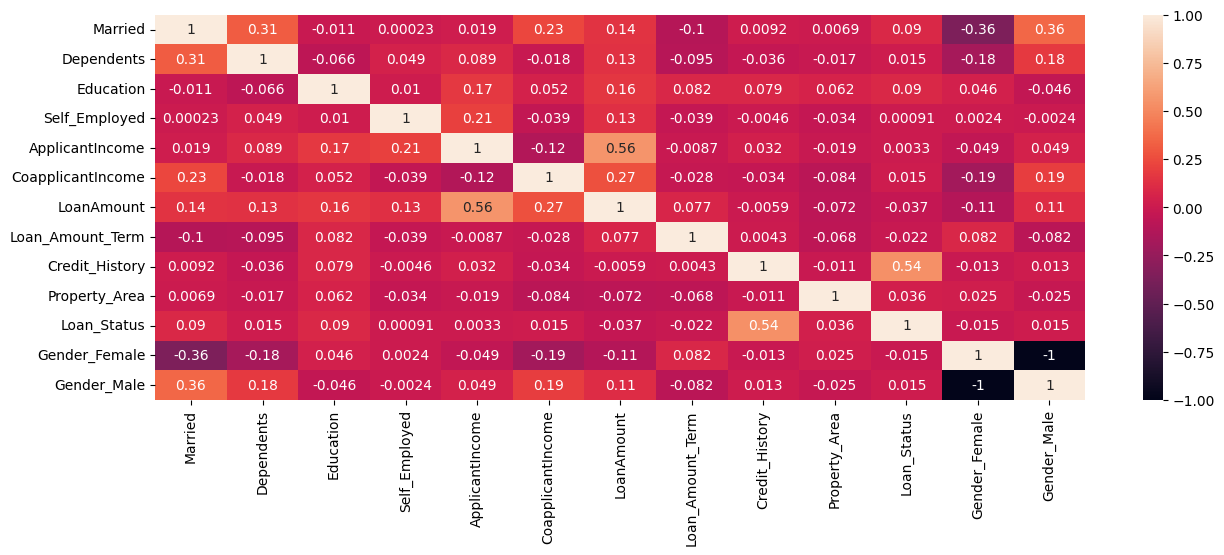

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

1. Credit history is highly correlated to our target
2. Education, self_employed, coapplicant income, loan amount, applicant income has negative correlation
3. Loan amount and applicant income are highly correlated
4. Gender-Married & Dependents-Married are correlated
5. This reflects that there are multicoreniality

# **Normalising data**

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=df.drop('Loan_Status',axis=1)
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])
x.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male
0,-1.374946,-0.680584,0.532258,-0.392419,0.164300,-0.818031,0.027212,0.273781,0.451327,1.233423,-0.473065,0.473065
1,0.727301,0.155680,0.532258,-0.392419,-0.125902,0.032923,-0.205458,0.273781,0.451327,-1.313134,-0.473065,0.473065
2,0.727301,-0.680584,0.532258,2.548299,-0.488770,-0.818031,-0.988939,0.273781,0.451327,1.233423,-0.473065,0.473065
3,0.727301,-0.680584,-1.878790,-0.392419,-0.584358,0.512573,-0.306553,0.273781,0.451327,1.233423,-0.473065,0.473065
4,-1.374946,-0.680584,0.532258,-0.392419,0.198914,-0.818031,-0.041180,0.273781,0.451327,1.233423,-0.473065,0.473065


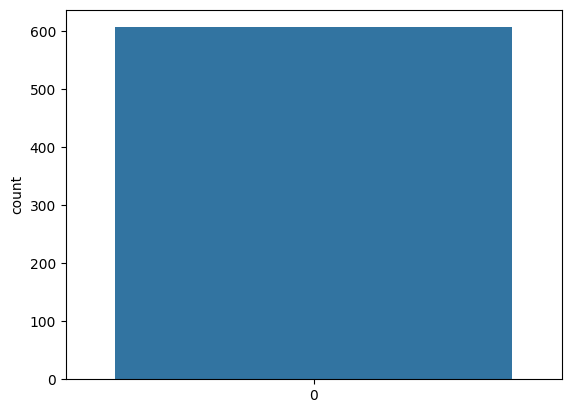

In [53]:
sns.countplot(df['Loan_Status'])
plt.show()

# Splitting dataset- Separating data and label

In [54]:
x#Features
y=df.Loan_Status#Target

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=4,test_size=0.25,stratify=y)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(455, 12) (455,) (152, 12) (152,)


# Creating model function to test multiple models and choose the ideal one

In [56]:
def mymodel(model):
    model.fit(xtrain,ytrain) #Training the model
    ypred=model.predict(xtest)#Makind predictions
    train_accuracy=model.score(xtrain,ytrain) #Evaluating the model
    test_accuracy=model.score(xtest,ytest)
    print(str(model)[:-2],'Accuracy') #Printing the scores
    if isinstance(ytest, np.ndarray):
        y_test_np = ytest
    else:
        y_test_np = ytest.to_numpy()
    print(y_test_np)
    print(ypred)
    print(type(ytest))
    print(type(ypred))
    confusion_matrix = metrics.confusion_matrix(y_test_np, ypred)
    print('Accuracy:',accuracy_score(ytest,ypred),"\nClassification Report:\n",classification_report(ytest,ypred), \
          '\nConfusion Matrix: \n', confusion_matrix)
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')




    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    print()
    print()
    return model

# Testing the accuracy of our model

KNeighborsClassifier Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.8157894736842105 
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        47
           1       0.80      0.97      0.88       105

    accuracy                           0.82       152
   macro avg      

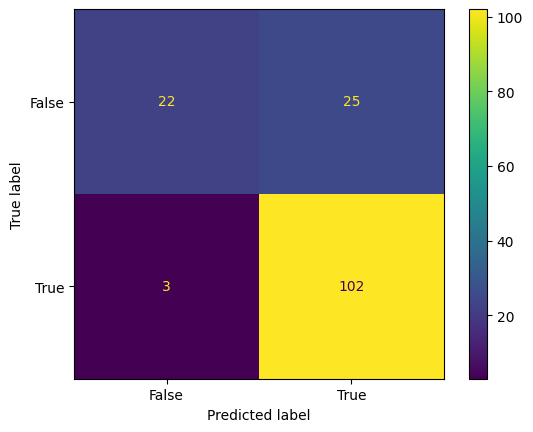



SVC(kernel='linear Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.8223684210526315 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.80      0.99      0.89       105

    accuracy                           0.82       152
   macro avg      

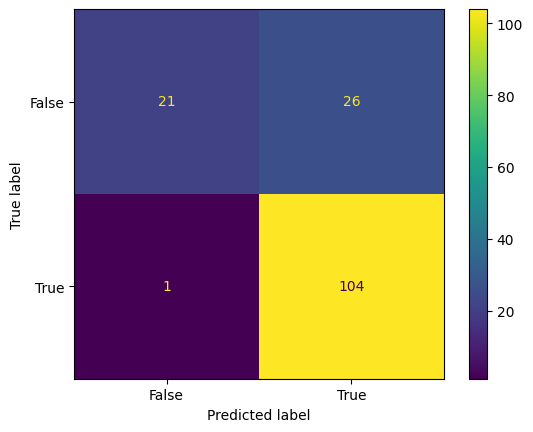



DecisionTreeClassifier Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.7302631578947368 
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58        47
           1       0.81      0.79      0.80       105

    accuracy                           0.73       152
   macro avg  

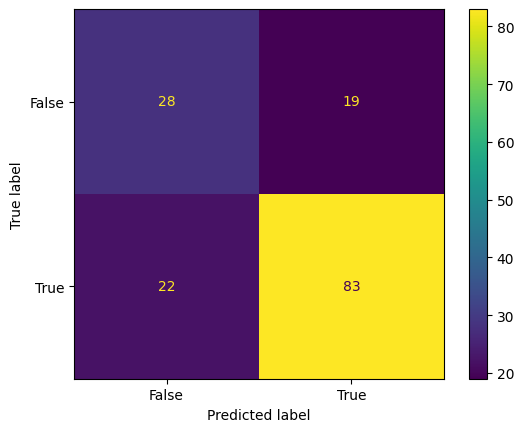



LogisticRegression Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.8223684210526315 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.80      0.99      0.89       105

    accuracy                           0.82       152
   macro avg      

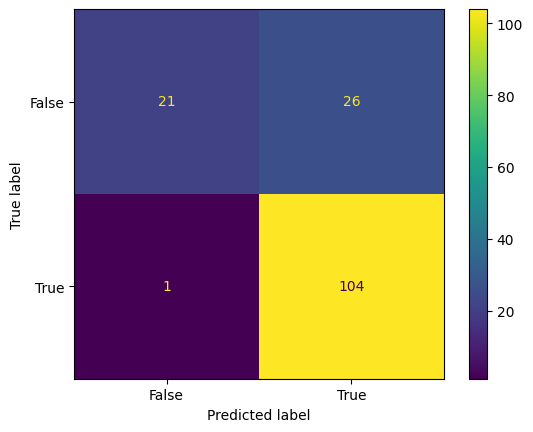



GaussianNB Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.8092105263157895 
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.45      0.59        47
           1       0.80      0.97      0.88       105

    accuracy                           0.81       152
   macro avg       0.84   

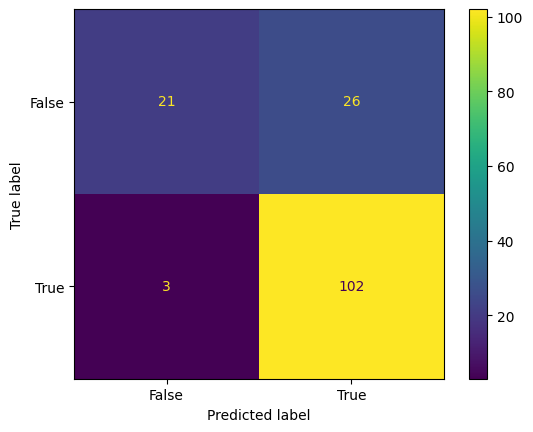



RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=8 Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.8223684210526315 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.80      0.99      0.89       105

    accuracy      

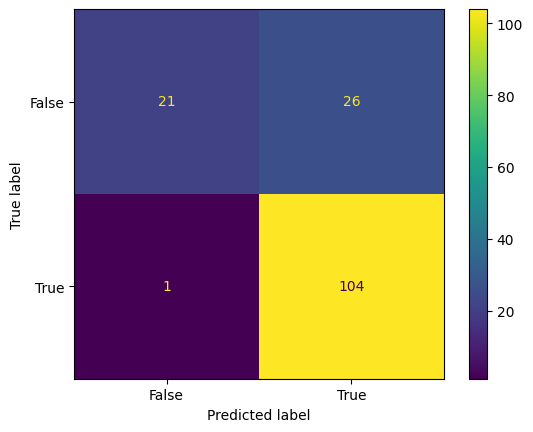

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC(kernel='linear'))
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

**KNN, Logistic regression,GaussianNB, and Random forest classifier...all seem to give the best accuracy of 82% with 0 false positive errors but our recall and precision doesnt seem to be upto mark so lets try imb-learn to balance our target variable ad train our model**     

# KNN Hypertuning

In [58]:
tr=[]
te=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)

    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)

    tr.append(train)
    te.append(test)

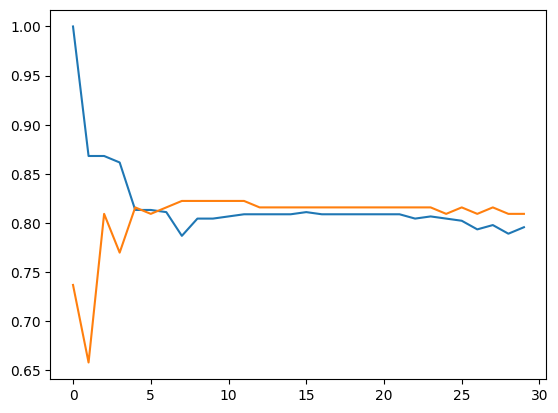

In [59]:
plt.plot(tr)
plt.plot(te)

**5 looks like the best k value**

KNeighborsClassifier Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.8157894736842105 
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        47
           1       0.80      0.97      0.88       105

    accuracy                           0.82       152
   macro avg      

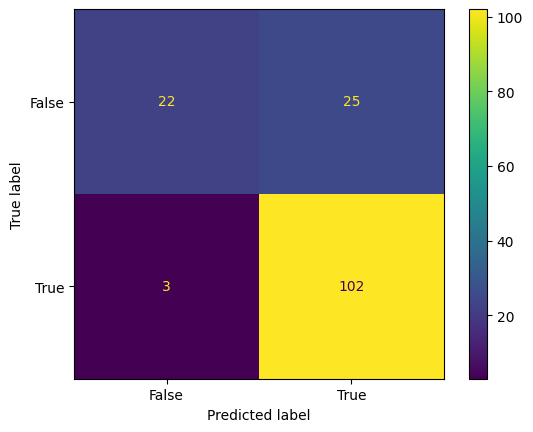

In [60]:
knn=mymodel(KNeighborsClassifier(n_neighbors=5))

still the recall and precision isnt upto mark

# GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV
parameters={'C':[0.1,10],'gamma':[0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [62]:
print('GridBestParameter: ',grid.best_params_)
print('GridBestScore: ',grid.best_score_)
print('GridBestEstimator: ',grid.best_estimator_)

GridBestParameter:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
GridBestScore:  0.810989010989011
GridBestEstimator:  SVC(C=10, gamma=0.01)


SVC(C=10, gamma=0.0 Accuracy
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 1]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1]
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Accuracy: 0.8223684210526315 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.80      0.99      0.89       105

    accuracy                           0.82       152
   macro avg       

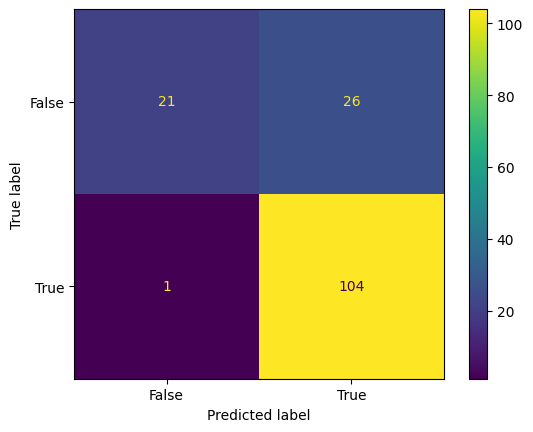

In [63]:
svm=mymodel(grid.best_estimator_)

GridSearchCV is also not giving the output as expected as the recall value is still low because our target is not balanced

# Trying imblearn to balance our target

In [64]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1.0,1,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0.0,0,0,1
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1.0,1,0,1
3,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1.0,1,0,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1.0,1,0,1


<Axes: ylabel='count'>

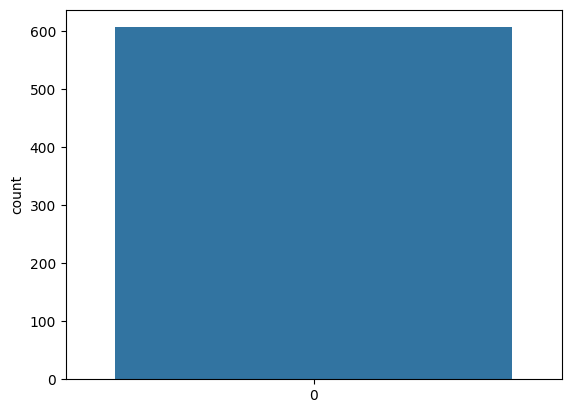

In [65]:
sns.countplot(df['Loan_Status'])

In [66]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status
print('Shape before balancing data',x.shape,y.shape)

#Importing necessary modules
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#Classifying the data
x,y=make_classification(n_samples=422,weights=[0.99],flip_y=0)

#Creating an object
ros=RandomOverSampler(sampling_strategy='minority')
x,y=ros.fit_resample(x,y)
print('Shape after balancing data',x.shape,y.shape)

Shape before balancing data (607, 12) (607,)
Shape after balancing data (834, 20) (834,)


<Axes: ylabel='count'>

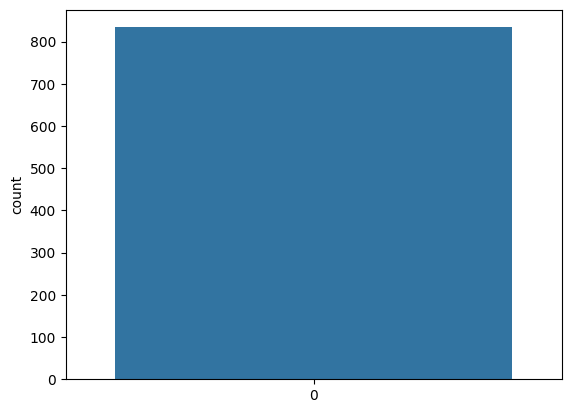

In [67]:
sns.countplot(y)

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.25)
print('Shape: ',xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

Shape:  (625, 20) (625,) (209, 20) (209,)


KNeighborsClassifier Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 1.0 
Classification Report:
               precision    recall

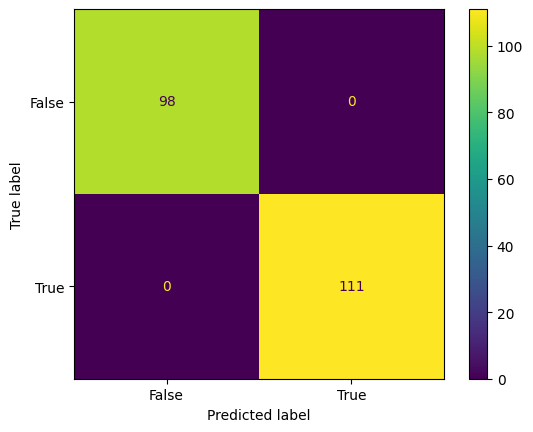



SVC Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   su

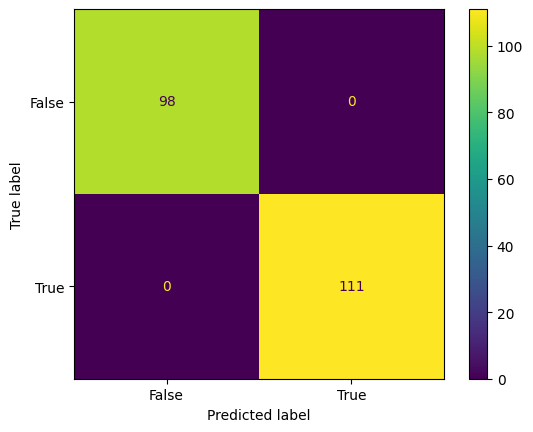



DecisionTreeClassifier Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 1.0 
Classification Report:
               precision    re

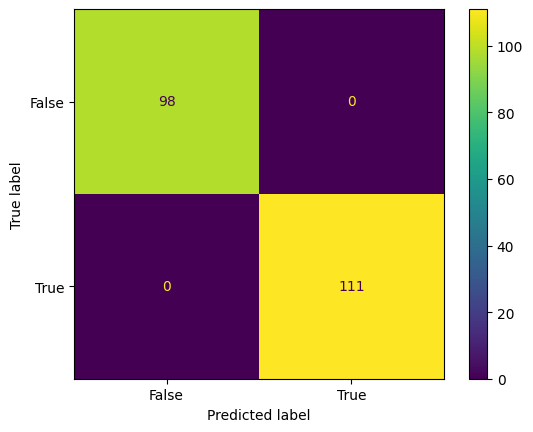



LogisticRegression Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 0.9952153110047847 
Classification Report:
               prec

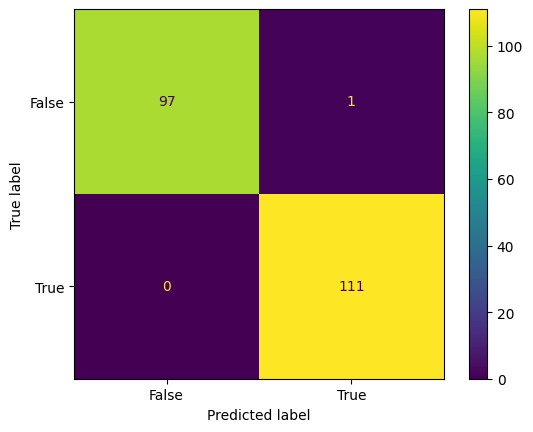



GaussianNB Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 0.9904306220095693 
Classification Report:
               precision   

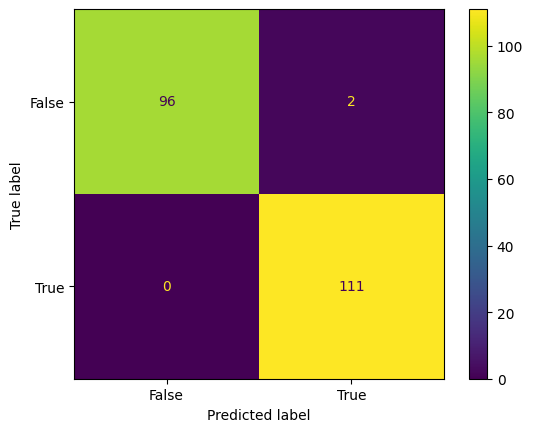



RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=8 Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 0.995215

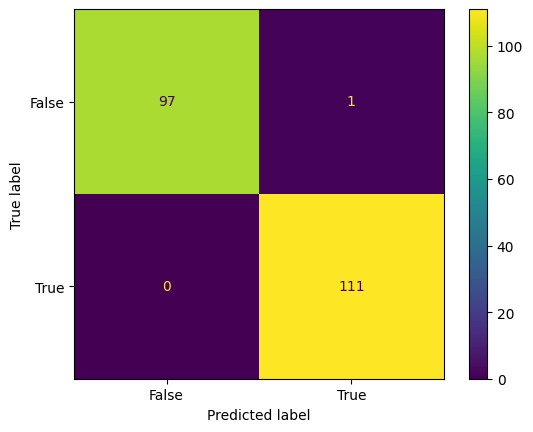

In [69]:
knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

**GausianNB or Logistic regression can be used for our model as its giving effective training testing accuracy without any risk of overfitting**

In [70]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status
print('Shape of model before balancing data',x.shape,y.shape)

#Importing necessary modules
from imblearn.over_sampling import SMOTE

#Classifying the data
make_classification(n_samples=422,weights=[0.99],flip_y=0,random_state=2)

#Creating an object
s=SMOTE(sampling_strategy='minority')
x,y=s.fit_resample(x,y)

print('Shape of model after balancing data',x.shape,y.shape)


Shape of model before balancing data (607, 12) (607,)
Shape of model after balancing data (838, 12) (838,)


KNeighborsClassifier Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 1.0 
Classification Report:
               precision    recall

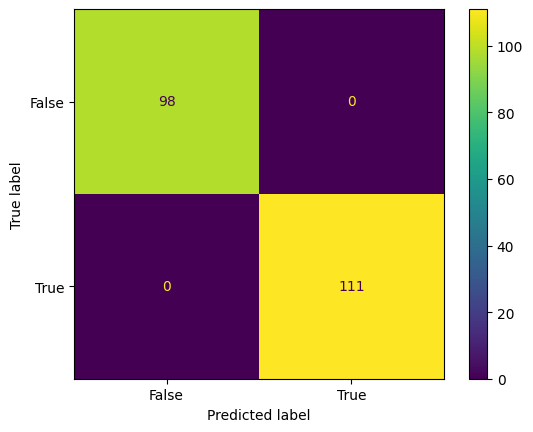



SVC Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   su

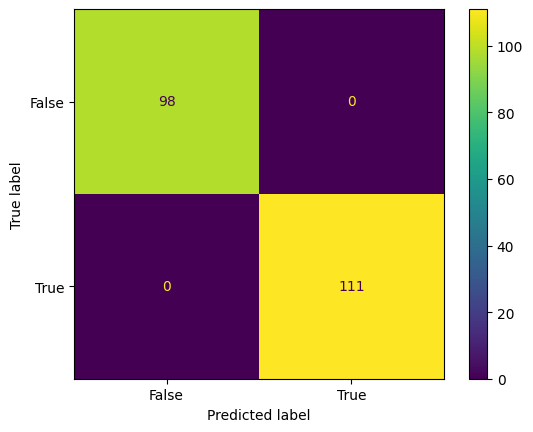



DecisionTreeClassifier Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 1.0 
Classification Report:
               precision    re

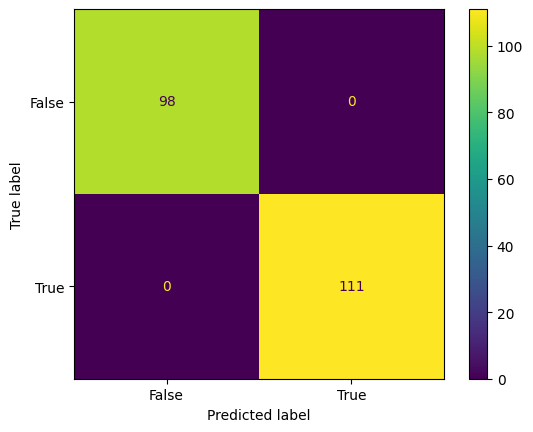



LogisticRegression Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 0.9952153110047847 
Classification Report:
               prec

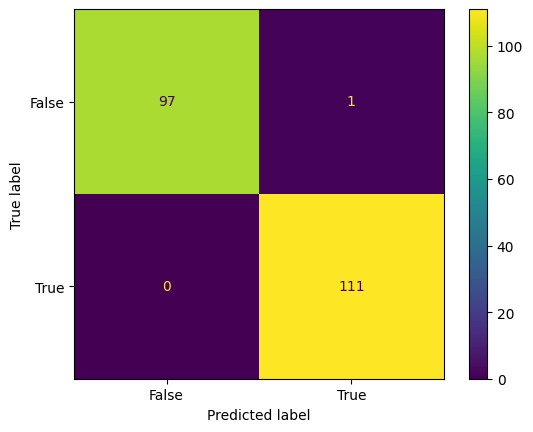



GaussianNB Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 0.9904306220095693 
Classification Report:
               precision   

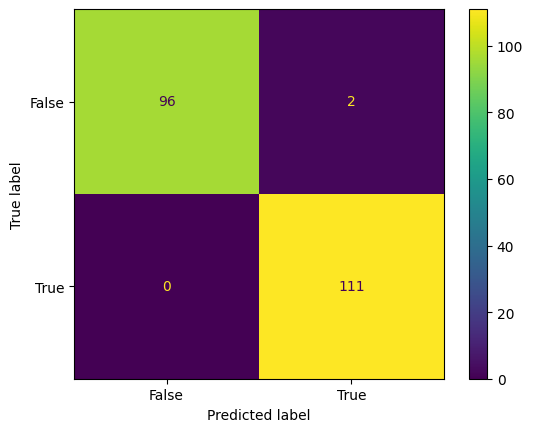



RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=8 Accuracy
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 1.0 
Cla

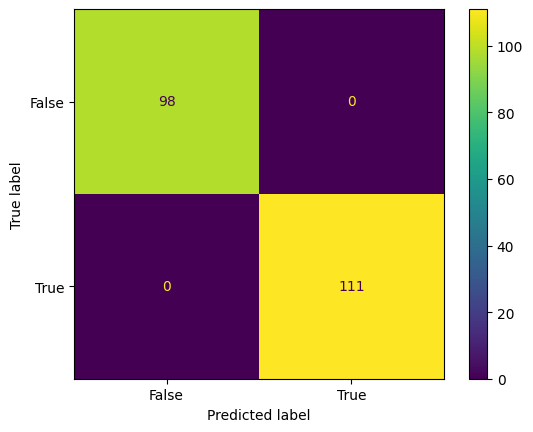

In [71]:
knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

**Again with SMOTE balancing algo, GausianNB or Logistic regression can be used for our model as its giving effective training testing accuracy without any risk of overfitting**